# Android Application with database


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def show_result(path, print='off'):
  path = path
  img = cv2.imread(path)
  if (print=='off'):
    pass
  elif (print=='on'):
    cv2_imshow(img)
  return img

### 1-5) Create a DB project in Android Studio
Now that the DB is all set, let's create an app to access the db with.

- Configure authorisation settings.
  - add the permission setting to the ```application``` tag.

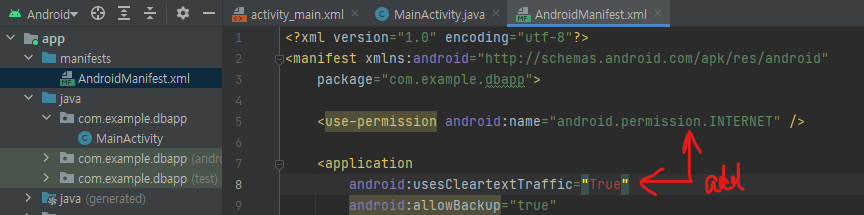

In [ ]:
show_result("/content/usepermission.png")

In [ ]:
    <use-permission android:name="android.permission.INTERNET" />

    <application
        android:usesCleartextTraffic="True"

Modify the design in ```MainActivity.java```.

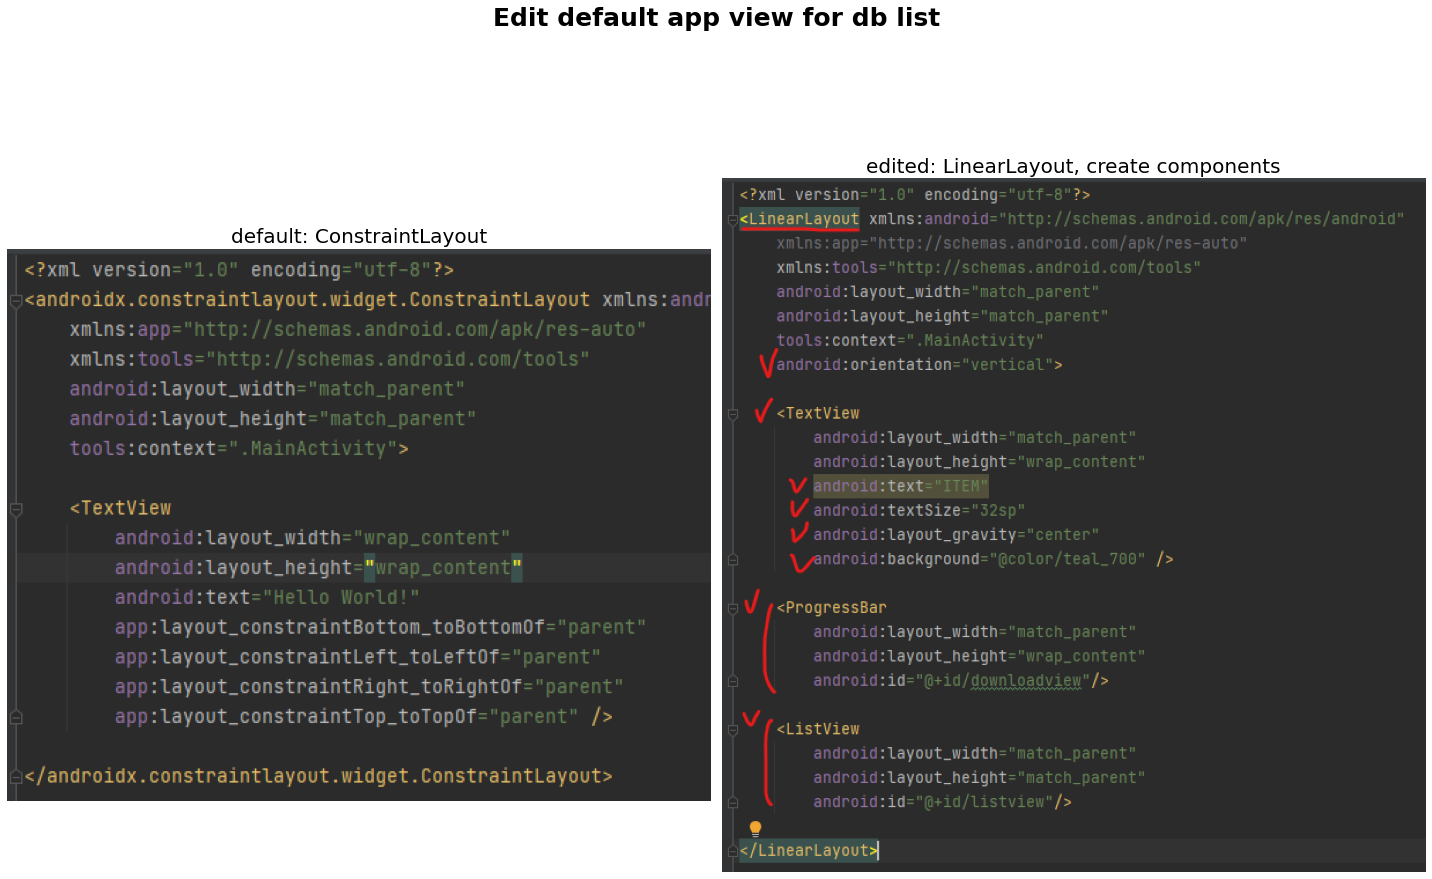

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15)) # constrained_layout=True

img1 = show_result("/content/editdesign1.png", print='off')
img2 = show_result("/content/editdesign2.png", print='off')
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
ax[0].imshow(img1)
ax[0].set_title('default: ConstraintLayout', fontsize=20)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].set_title('edited: LinearLayout, create components', fontsize=20)
ax[1].axis('off')
fig.suptitle("Edit default app view for db list", fontsize=25, fontweight='bold')
fig.tight_layout()

### Create DTO class
- can be replaced by HashMap (dictionary)


In [ ]:
package com.example.dbapp;

import java.io.Serializable;

// Serialise objects
// send data as an object.
// pickle module provides this function in python

public class Item implements Serializable {

    private int itemid;
    private String itemname;
    private int price;
    private String description;
    private String imgurl;

    // Popular languages and frameworks today
    // automates the process once the variables are declared.

    // constructor without parameters - for general use
    public Item(){
    }
    // constructor with parameters
    // for testing and reading data from external sources
    // for quick object creation
    public Item(int itemid, String itemname, int price, String description, String imgurl){
        this.itemid = itemid;
        this.itemname = itemname;
        this.price = price;
        this.description = description;
        this.imgurl = imgurl;

    }

    public int getItemid() {
        return itemid;
    }

    public String getItemname() {
        return itemname;
    }

    public int getPrice() {
        return price;
    }

    public String getDescription() {
        return description;
    }

    public String getImgurl() {
        return imgurl;
    }

    public void setItemid(int itemid) {
        this.itemid = itemid;
    }

    public void setItemname(String itemname) {
        this.itemname = itemname;
    }

    public void setPrice(int price) {
        this.price = price;
    }

    public void setDescription(String description) {
        this.description = description;
    }

    public void setImgurl(String imgurl) {
        this.imgurl = imgurl;
    }

    // method for debugging
    // __str__() does the job in python
    // li = [1, 2, 3, 4] print(li) => print(li.__str__())
    @Override
    public String toString() {
        return "Item{" +
                "itemid=" + itemid +
                ", itemname='" + itemname + '\'' +
                ", price=" + price +
                ", description='" + description + '\'' +
                ", imgurl='" + imgurl + '\'' +
                '}';
    }
}

### 1-6) Download .json 





**Device <---> device**  
 If one device transmits data to another device every time data is generated, the number of data transmissions becomes too high.
 If you create a buffer, store the content to be transmitted in the buffer, and send it at a certain time or in units of time, to reduce the number of transmissions and increase efficiency.
 
<br />

**Device hardware <---> Operating system <---> JVM <---> Java Application**   
=> Makes a request to the JVM to create a Java Program to operate the hardware , and the JVM makes a request to OS to process it. The method the JVM makes a request to the operating system is called the Native Method.  When you use a BufferedReader, the JVM does not call the Native method every time, but collects and calls it.
 
<br />

**Dependency injection**
create outside, 



In [ ]:
package com.example.dbapp;

import androidx.appcompat.app.AppCompatActivity;

import android.os.Bundle;
import android.util.Log;

import org.json.JSONArray;
import org.json.JSONObject;

import java.io.BufferedReader;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.URL;
import java.util.List;

public class MainActivity extends AppCompatActivity {

    // variable to store downloaded string
    String json;

    // store parsed result
    List<Item> itemList;

    // thread class for downloads
    class ItemThread extends Thread {
        public void run(){
            try {
                // create url for download
                URL url = new URL("http://172.30.1.10:5000/item");
                // connect
                // casting. further reading on abstract class recommended.
                HttpURLConnection con = (HttpURLConnection) url.openConnection();
                // set options
                // if use cache is true, previously downloaded data will be reused.
                // might not be the best option for you depending on what you do.
                con.setUseCaches(false);
                // set timeout
                con.setConnectTimeout(300000);

                // create stringstream
                BufferedReader br = new BufferedReader(new InputStreamReader(con.getInputStream()));
                // object that stores string which "VARIABLE"
                // String class stores invariable string.
                // if something is added to existing content, memory is re-assigned.
                // SB is used to prevent the waste of resource
                StringBuilder sb = new StringBuilder();

                // read string
                // we don't know how much, so interate using while
                while(true){
                    // read one line
                    // store that line, if none, null.
                    String line = br.readLine();

                    // if line is null, it means we've read everything.
                    if(line == null){
                        break;
                    }

                    // add what's read to sb.
                    sb.append(line.trim());
                }

                // store whatt br reads in json.
                json = sb.toString();

                Log.e("downloaded data", json);

                // JSON parsing - need to understand your data.
                // in java, JSONArray and JSONObject are used to parse JSON.
                // python can converts json itself.
                // automatic conversion: {} -> dict, [] -> list

                // convert the data into an object.
                JSONObject obj = new JSONObject(json);
                // extract the array of keys from the data object.
                JSONArray arr = obj.getJSONArray("data");

                // iterate over the array.
                int i = 0;
                while(i< arr.length()){
                    // get array items
                    JSONObject object = arr.getJSONObject(i);   // locate array items by index.
                    Item item = new Item();
                    item.setItemid(object.getInt("item"));
                    Log.e("item", object.getInt("item") + "");
                    item.setItemname(object.getString("itemname"));
                    Log.e("itemname", object.getString("itemname") + "");
                    item.setPrice(object.getInt("price"));
                    Log.e("price", object.getInt("price") + "");
                    item.setDescription(object.getString("description"));
                    Log.e("description", object.getString("description") + "");
                    item.setImgurl(obj.getString("imgurl"));
                    Log.e("imgurl", object.getString("imgurl") + "");
                    
                    // add to the list
                    itemList.add(item);

                    i = i + 1;
                }

                // close stream and disconnect
                br.close();
                con.disconnect();


            } catch (Exception e) {
                // check message on console
                Log.e("Download or parsing failed", e.getLocalizedMessage());
            }
        }
    }

    @Override
    protected void onCreate(Bundle savedInstanceState){
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        // Create and run a thread. the server should be up running.
        new ItemThread().start();

    }

}

### 1-7) ListView
- Built in templates available. To use one of the builtins, set parameter (pos2) as ```android.R.layout.template``` when creating an Adapter
- When designing a custom list view, create a ```layout``` file for the desired design; create a class that inherits from ```BaseAdaptor``` and redefine specific components.
- GUI programming is similar across iOS, Android, and MS.


### 1-8) ItemAdapter

In [ ]:
package com.example.dbapp;

import android.content.Context;
import android.graphics.Bitmap;
import android.graphics.BitmapFactory;
import android.os.Handler;
import android.os.Looper;
import android.os.Message;
import android.util.Log;
import android.view.LayoutInflater;
import android.view.View;
import android.view.ViewGroup;
import android.widget.BaseAdapter;
import android.widget.ImageView;
import android.widget.TextView;

import java.io.InputStream;
import java.net.URL;
import java.util.HashMap;
import java.util.List;
import java.util.Map;
import java.util.logging.LogRecord;

public class ItemAdapter extends BaseAdapter{
    // Context needed to display View - pass in Activity
    Context context;
    //data for ListView
    List<Item> data;
    // variable to store cell id
    int layout;
    // variable that converts xml content into View class
    LayoutInflater inflater;

    // constructor
    public ItemAdapter(Context context, List<Item> data, int layout){
        this.context = context;
        this.data = data;
        this.layout = layout;

        inflater = (LayoutInflater) context.getSystemService(
                Context.LAYOUT_INFLATER_SERVICE);
    }

    // set row number. = iteration frequency
    @Override
    public int getCount(){
        return data.size();
    }

    // set string
    @Override
    public Object getItem(int i){
        return data.get(i).getItemid();
    }

    @Override
    public long getItemId(int i){
        return (long) i;
    }

    ImageView imageView;
    Bitmap bit;

    // handler that displays downloaded image
    Handler imageHandler = new Handler(Looper.getMainLooper()) {
        // sends Map to msg obj
        // sends to map: {imageview: ImageView, bit: Bitmap}

        public void handleMessage(Message msg) {
            Map<String, Object> map = (Map<String, Object>) msg.obj;
            ImageView imageView = (ImageView) map.get("imageview");
            Bitmap bit = (Bitmap) map.get("bit");
            imageView.setImageBitmap(bit);
        }
    };

    // thread for downloads
    class ImageThread extends Thread{
        String imagename;
        ImageView imageView;

        public void run(){
            try {
                // create a stream for image downloads
                InputStream inputStream = new URL("http://172.30.1.10:5000/imagedownload/" + imagename).openStream();
                Bitmap bit = BitmapFactory.decodeStream(inputStream);
                inputStream.close();

                Message msg = new Message();
                Map<String, Object> map = new HashMap<String, Object>();

                map.put("bit", bit);
                map.put("imageview", imageView);

                msg.obj = map;
                // call Handler along with Message
                imageHandler.sendMessage(msg);

            } catch (Exception e) {
                Log.e("Download image", "failed");
            }
        }
    };

    @Override
    public View getView(int i, View view, ViewGroup viewGroup){
        // 출력할 셀 생성?
        // 먼저 출력할 셀 가지고 생성?
        View returnView = view;
        // 출력한 적이 없다면 직접 생성?
        if(returnView == null){
            returnView = inflater.inflate(layout, viewGroup, false);
        }

        // i = index
        TextView itemname = (TextView) returnView.findViewById(R.id.itemname);
        itemname.setText(data.get(i).getItemname());

        TextView price = (TextView) returnView.findViewById(R.id.price);
        price.setText(data.get(i).getPrice() + "won");

        TextView description = (TextView) returnView.findViewById(R.id.desc);
        description.setText(data.get(i).getDescription());

        ImageView imageView = (ImageView) returnView.findViewById(R.id.itemimage);
        ImageThread th = new ImageThread();
        th.imagename = data.get(i).getImgurl();
        th.imageView = imageView;
        th.start();

        return returnView;
    }
}

### 1-9) Send files from Android to Server
- web server url: ```http;//000.00.0.00:0000/insert```
- parameters: ```itemname```, ```price```, ```description```, ```imgur(flie)```
- send method: ```POST```

Declare variables in ```ItemInsertActivity.java```.

# Error Notes
 